In [4]:
# Install required libraries 
!pip install pandas matplotlib seaborn --quiet

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Show plots in the notebook
%matplotlib inline


In [6]:
import zipfile

# Path to your zip file
zip_path = "C:/Users/susan/Downloads/archive (1).zip"

# Extract to current directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

print("✅ ZIP file extracted successfully.")


✅ ZIP file extracted successfully.


In [7]:
import pandas as pd

# Load the CSV file (extracted from the zip)
df = pd.read_csv("Titanic-Dataset.csv")

# Confirm it's loaded
print("✅ Dataset loaded successfully.")
print(f"Shape of dataset: {df.shape}")

# Show first few rows
df.head()


✅ Dataset loaded successfully.
Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Summary statistics for numerical features
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


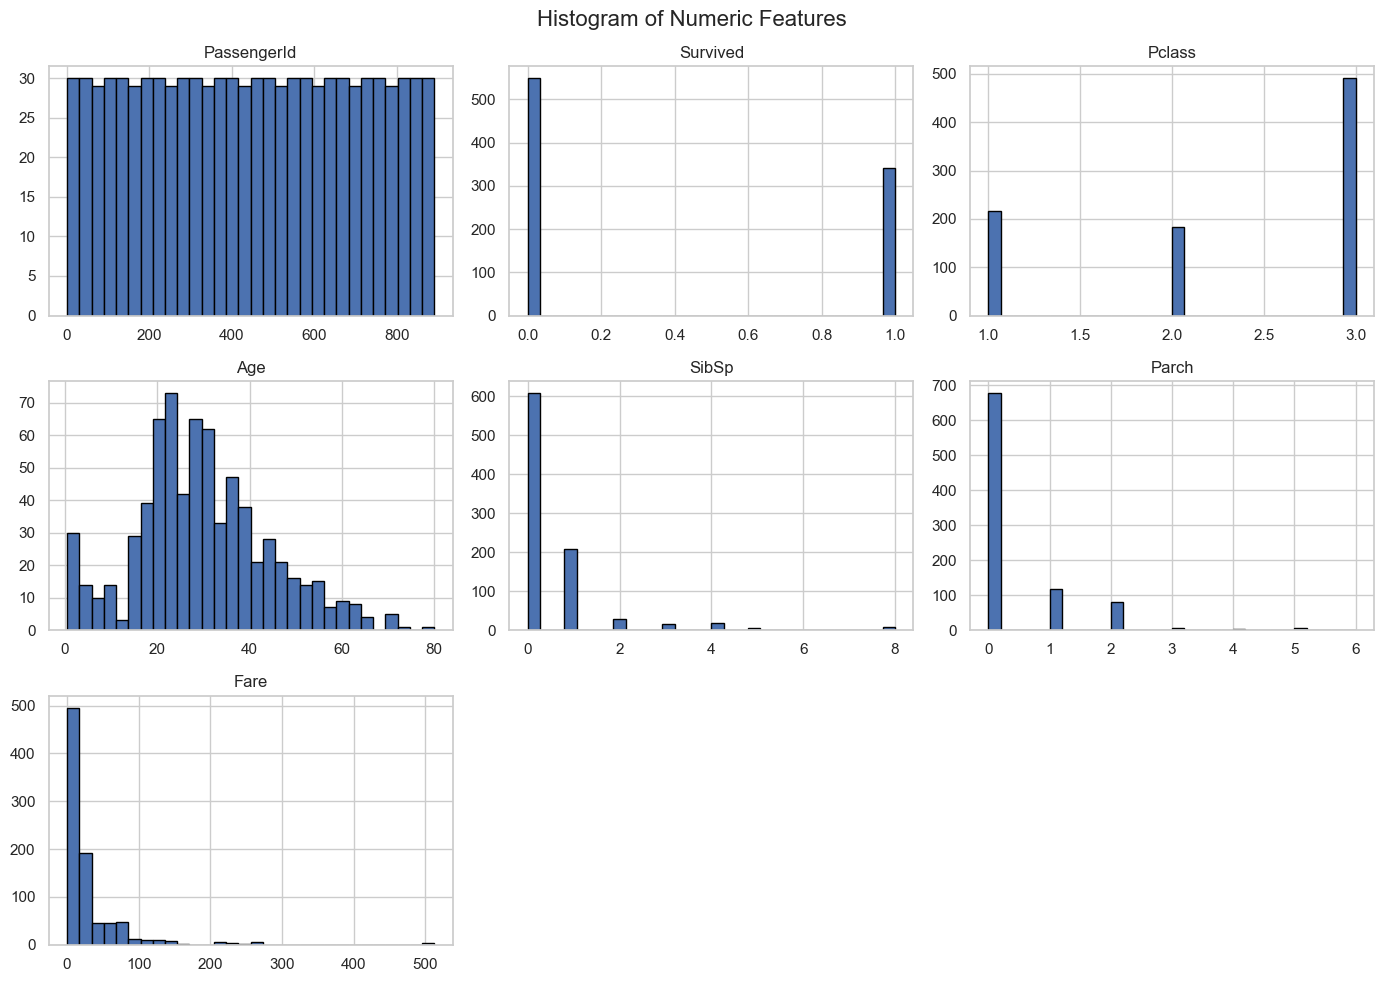

In [9]:
import matplotlib.pyplot as plt

# Set up the figure size
df.hist(figsize=(14, 10), bins=30, edgecolor='black')

plt.suptitle("Histogram of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


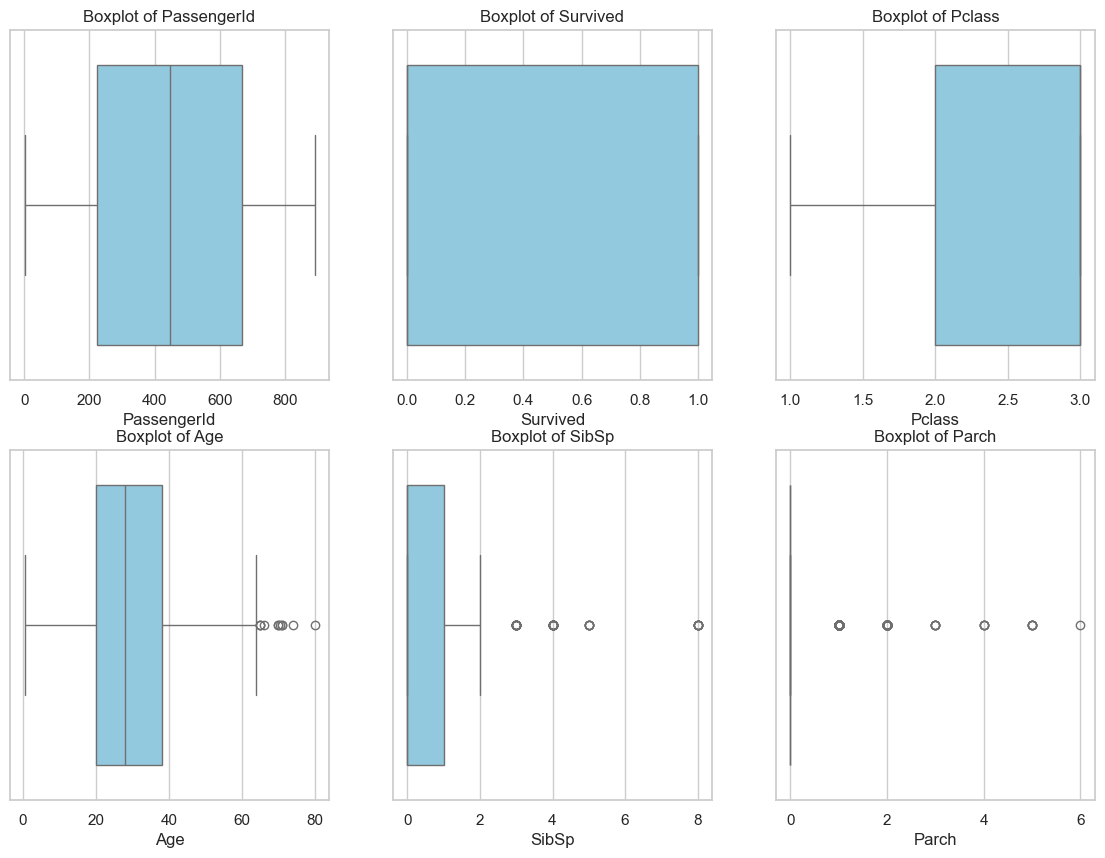

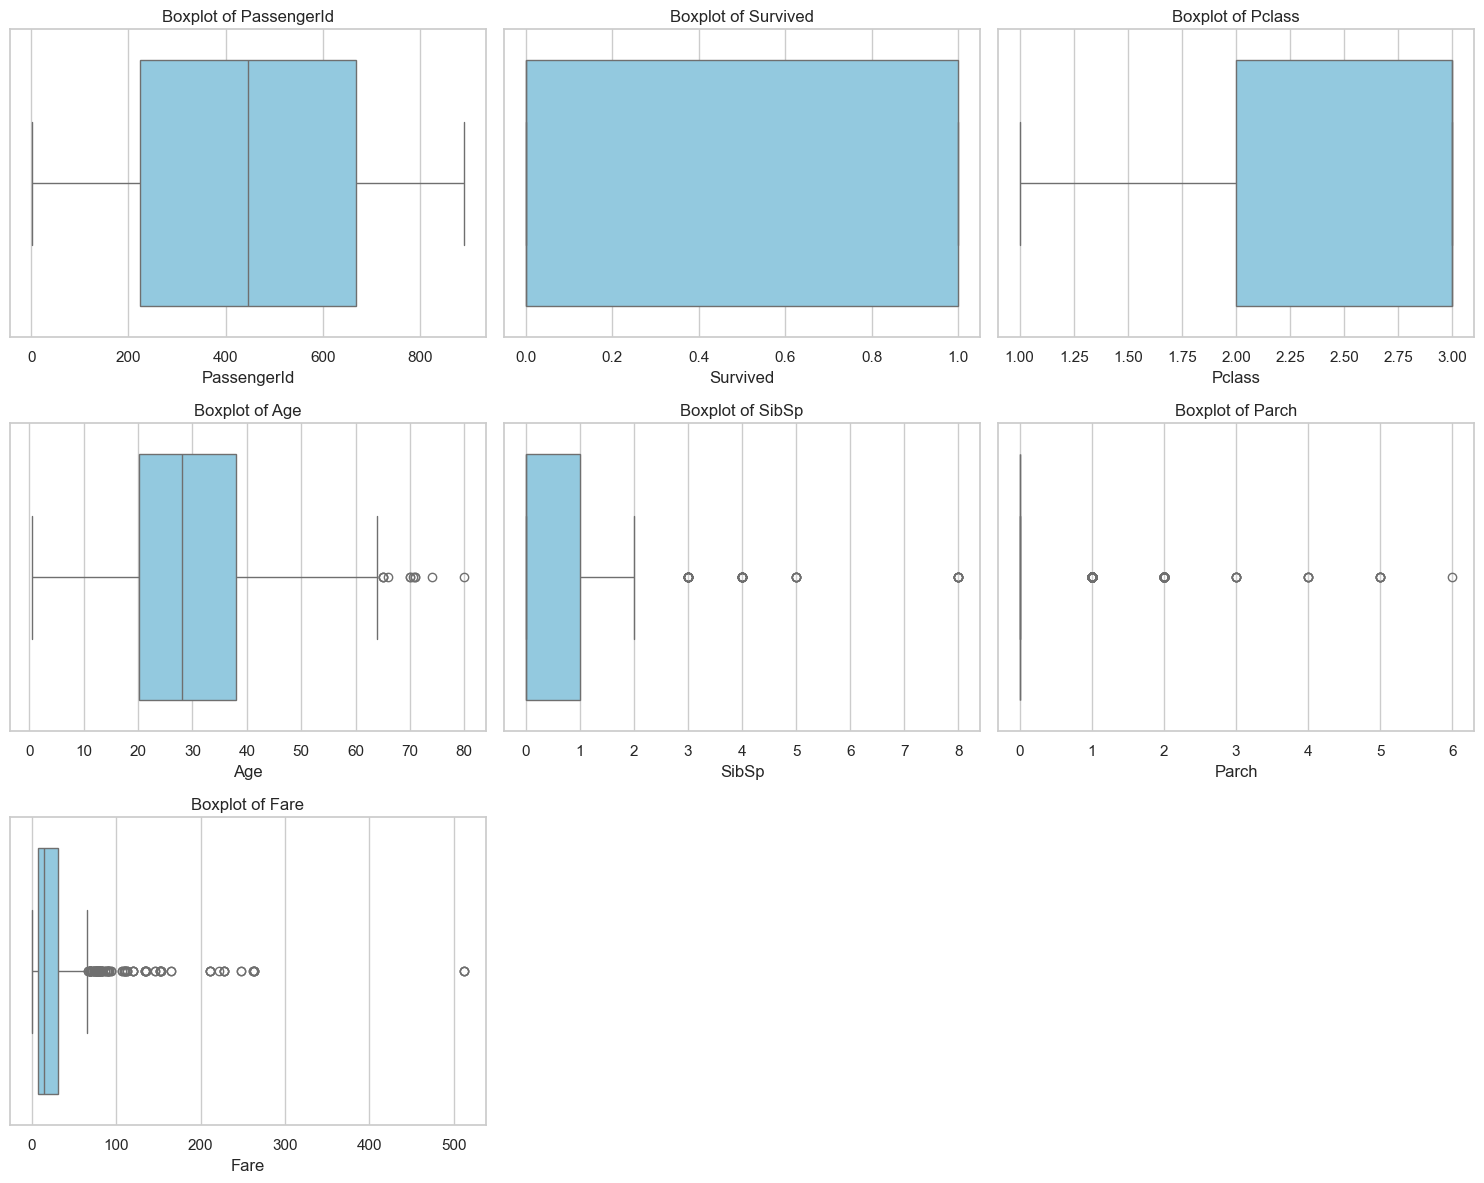

In [11]:
import math

# Get numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Total numeric features
n = len(numeric_cols)

# Compute number of rows and columns for subplots
cols = 3
rows = math.ceil(n / cols)

# Plot boxplots
plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


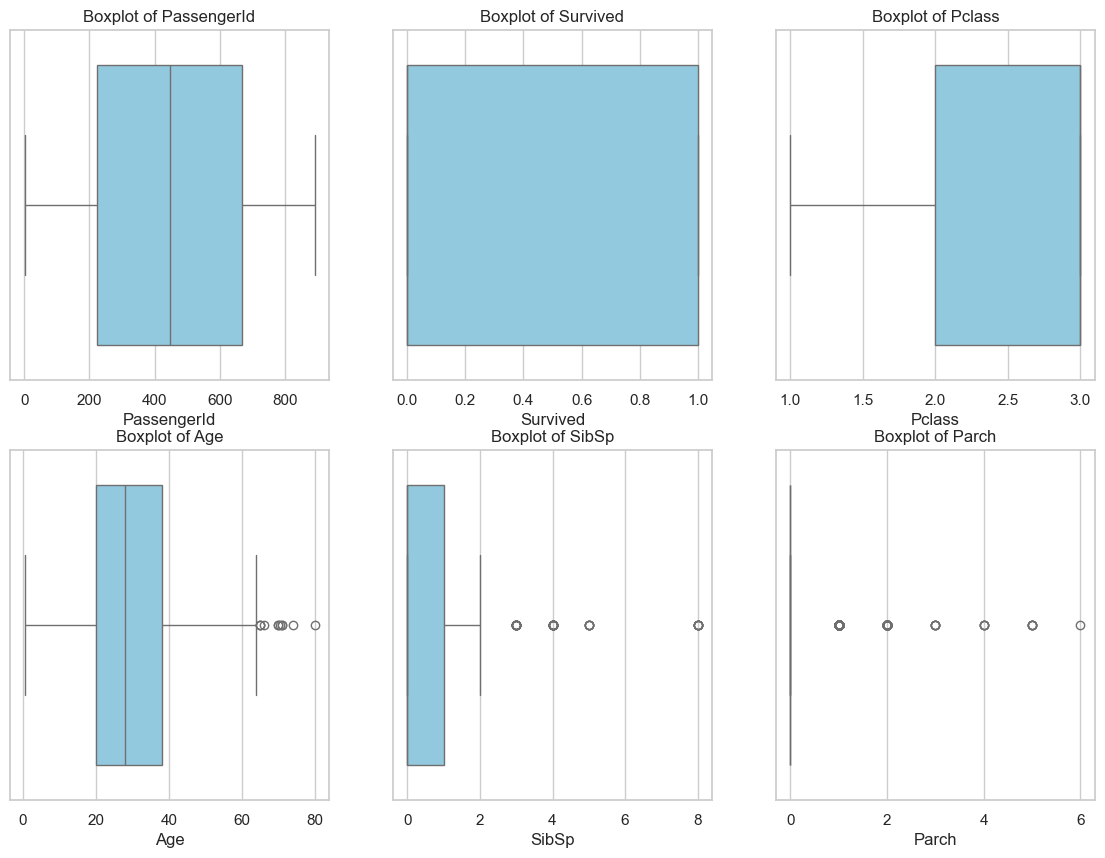

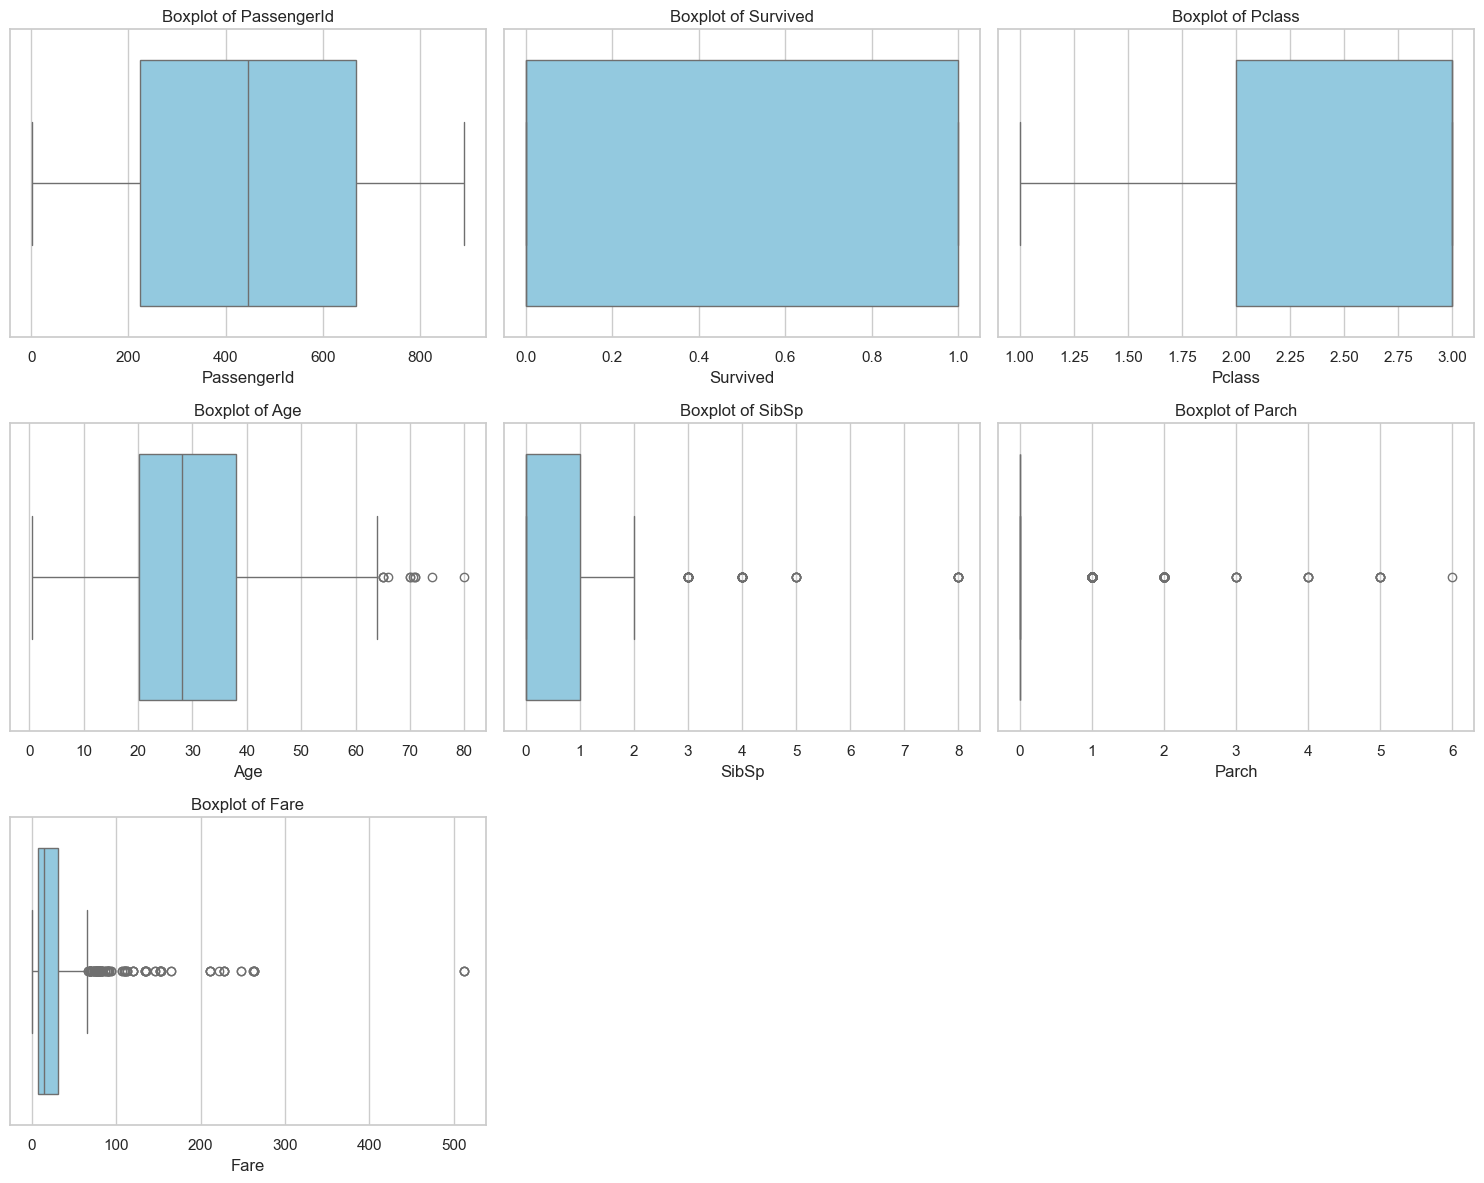

In [11]:
import math

# Get numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Total numeric features
n = len(numeric_cols)

# Compute number of rows and columns for subplots
cols = 3
rows = math.ceil(n / cols)

# Plot boxplots
plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


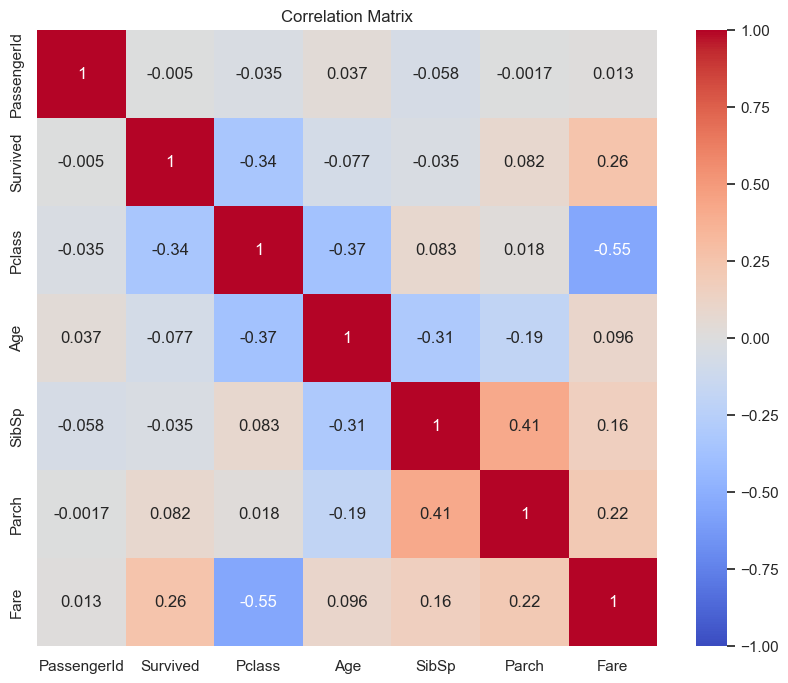

In [12]:
# Cell: Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

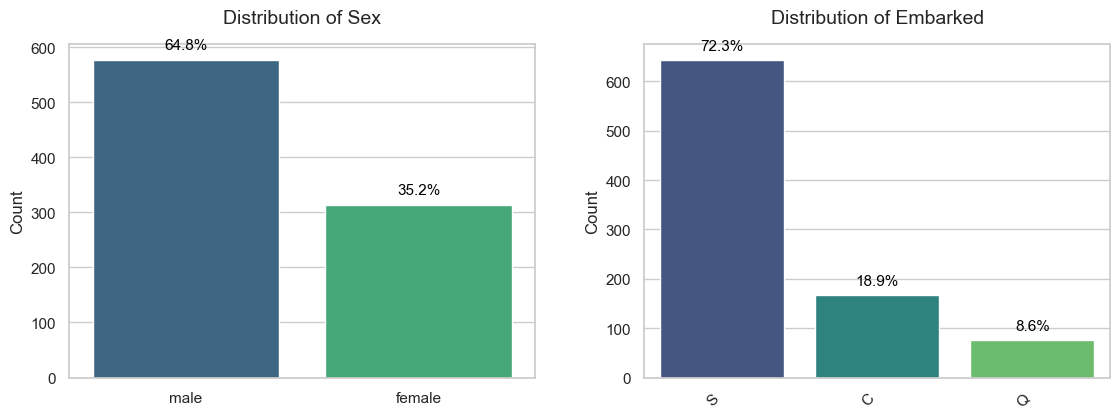

In [20]:
# Step 1: Prepare the data
meaningful_cats = ['Sex', 'Embarked']  # Target columns for Titanic
plt.figure(figsize=(12, 5))

for i, col in enumerate(meaningful_cats, 1):
    # Calculate statistics
    value_counts = df[col].value_counts()
    percentages = (value_counts / len(df)) * 100
    
    # Create subplot
    plt.subplot(1, 2, i)
    ax = sns.countplot(
        x=col,
        data=df,
        order=value_counts.index,
        palette='viridis',
        hue=df[col],
        legend=False
    )
    
    # Formatting
    plt.title(f'Distribution of {col}', fontsize=14, pad=15)
    plt.xlabel('')
    plt.ylabel('Count')
    
    # Add percentage labels - FUTURE-PROOF VERSION
    for idx, (val, count) in enumerate(value_counts.items()):
        percentage = percentages.loc[val]  # Correct label-based access
        ax.text(
            idx,  # x-position matches bar order
            count + 20,  # y-position above bar
            f'{percentage:.1f}%',
            ha='center',
            fontsize=11,
            color='black'
        )
    
    # Rotate Embarked labels
    if col == 'Embarked':
        plt.xticks(rotation=45, ha='right')

plt.tight_layout(pad=3)
plt.show()